In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Project Overview

**The Titanic dataset is a classical supervised machine learning problem. Given passenger information such as gender, age, and ticket class, the goal is to predict whether a passenger survived the disaster.

This notebook demonstrates a full real‑world data science workflow, starting from raw CSV files and ending with model evaluation and insights.**

# Dataset Description

**The data is provided in three files:

train.csv → Used to train models (includes the target variable Survived)

test.csv → Used for final predictions (no ground truth provided)

gender_submission.csv → Example submission format

Target Variable

Survived: 0 = Did not survive, 1 = Survived

Key Features

Pclass: Ticket class (proxy for socio‑economic status)

Sex: Gender

Age: Passenger age

SibSp, Parch: Family relationships onboard

Fare: Passenger fare

Embarked: Port of embarkation**

# import libraries

In [2]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# load dataset

In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')


train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**there is missing values we will handle it later  **

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Missing values in Age, Cabin, and Embarked

Mix of numerical and categorical features**

In [8]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# relations between features

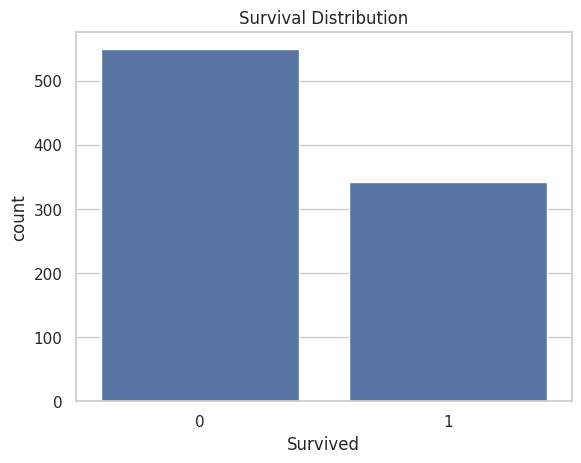

In [10]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution')
plt.show()

# Exploratory Data Analysis (EDA)

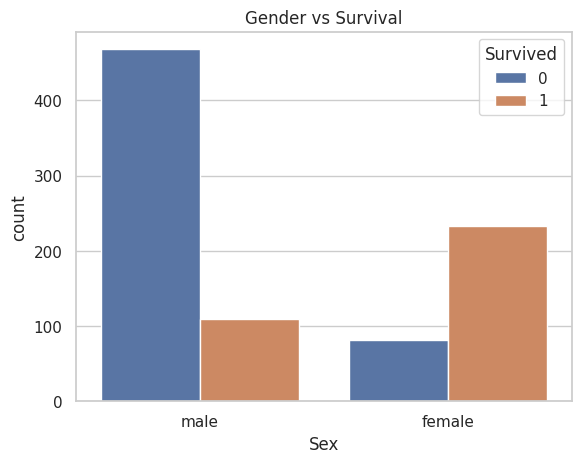

In [11]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Gender vs Survival')
plt.show()

**Females had a significantly higher survival rate.**

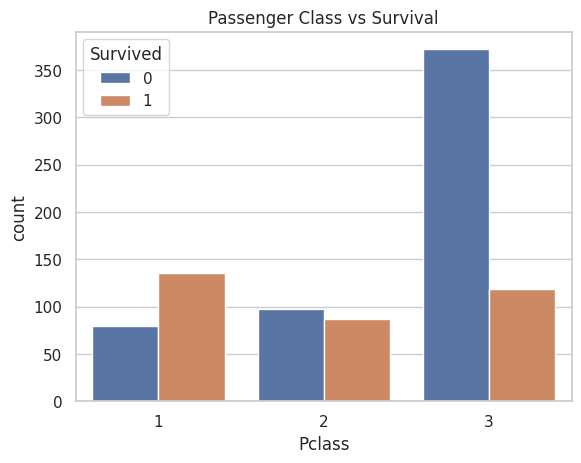

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Passenger Class vs Survival')
plt.show()

**First‑class passengers survived more frequently.**

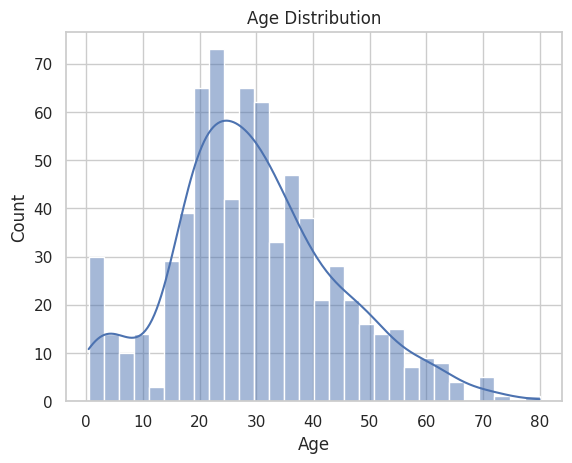

In [13]:
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

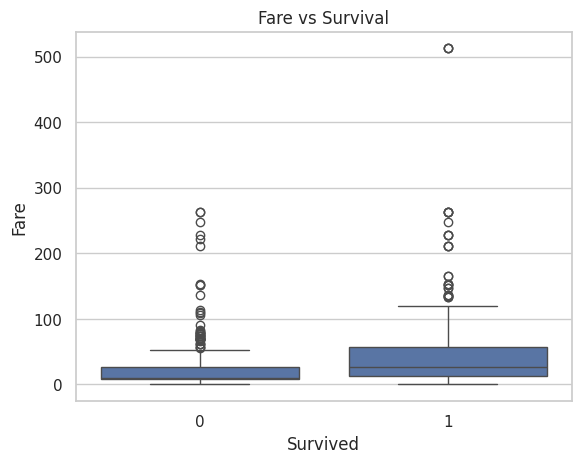

In [14]:
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Fare vs Survival')
plt.show()

# Data Cleaning & Preprocessing 

In [15]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age']\
    .transform(lambda x: x.fillna(x.median()))

test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age']\
    .transform(lambda x: x.fillna(x.median()))


In [17]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_17/2921213762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
/tmp/ipykernel_17/2921213762.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [18]:
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

**Drop Irrelevant Features**

In [19]:
train_df.drop(columns=['Name', 'Ticket'], inplace=True)
test_df.drop(columns=['Name', 'Ticket'], inplace=True)

# Feature Engineering

In [20]:
train_df.value_counts()

PassengerId  Survived  Pclass  Sex     Age   SibSp  Parch  Fare     Embarked
891          0         3       male    32.0  0      0      7.7500   Q           1
1            0         3       male    22.0  1      0      7.2500   S           1
2            1         1       female  38.0  1      0      71.2833  C           1
3            1         3       female  26.0  0      0      7.9250   S           1
4            1         1       female  35.0  1      0      53.1000  S           1
                                                                               ..
16           1         2       female  55.0  0      0      16.0000  S           1
15           0         3       female  14.0  0      0      7.8542   S           1
14           0         3       male    39.0  1      5      31.2750  S           1
13           0         3       male    20.0  0      0      8.0500   S           1
12           1         1       female  58.0  0      0      26.5500  S           1
Name: count, Length: 

**Create Family Size Feature**

**With the number of siblings/spouse and the number of children/parents we can create new feature called Family Size.**

In [21]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [22]:
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)


# Encoding Categorical Features

In [23]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# Feature / Target Split

In [24]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model training 

# try logistic regression

In [27]:
log_model = LogisticRegression(
    C=10,
    solver='liblinear',
    max_iter=1000
)

log_model.fit(X_train_scaled, y_train)

LogisticRegression(C=10, max_iter=1000, solver='liblinear')

# svm

In [28]:
svm_model = SVC(
    kernel='linear',
    C=10,
    probability=True
)

svm_model.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear', probability=True)

# dt 

In [29]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

# rf

In [30]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=7,
    min_samples_split=5,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [31]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

# model evaluate

In [32]:
def evaluate_model(name, model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print('-'*50)

In [33]:
evaluate_model('Logistic Regression', log_model, X_test_scaled, y_test)
evaluate_model('SVM', svm_model, X_test_scaled, y_test)
evaluate_model('Decision Tree', dt_model, X_test, y_test)
evaluate_model('Random Forest', rf_model, X_test, y_test)
evaluate_model('Naive Bayes', nb_model, X_test_scaled, y_test)

Model: Logistic Regression
Accuracy: 0.8156424581005587
Confusion Matrix:
 [[97 13]
 [20 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

--------------------------------------------------
Model: SVM
Accuracy: 0.7877094972067039
Confusion Matrix:
 [[96 14]
 [24 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179

--------------------------------------------------
Model: Decision Tree
Acc

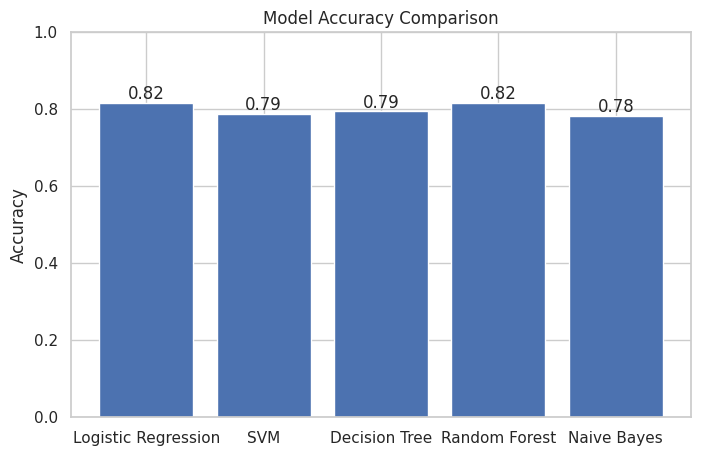

In [34]:
models = {
    'Logistic Regression': log_model,
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb_model
}

accuracies = []
for name, model in models.items():
    if name in ['Decision Tree', 'Random Forest']:
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.bar(models.keys(), accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)

for i,v in enumerate(accuracies):
    plt.text(i, v+0.01, f"{v:.2f}", ha='center')

plt.show()

# add voting classifier 

In [35]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
        ('lr', log_model),
        ('svm', svm_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

voting_model.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, max_iter=1000,
                                                 solver='liblinear')),
                             ('svm',
                              SVC(C=10, kernel='linear', probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=7,
                                                     min_samples_split=5,
                                                     n_estimators=300,
                                                     random_state=42))],
                 voting='soft')

In [36]:
y_pred_voting = voting_model.predict(X_test_scaled)


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Model: Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))
print("Classification Report:\n", classification_report(y_test, y_pred_voting))


Model: Voting Classifier
Accuracy: 0.8156424581005587
Confusion Matrix:
 [[99 11]
 [22 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



**Model Performance Comparison

To objectively evaluate the performance of different machine learning algorithms, multiple models were trained and tested using the same preprocessing pipeline.  
Accuracy was chosen as the primary evaluation metric to provide a clear and intuitive comparison between models.

The following visualization summarizes the accuracy achieved by each model on the test set, including both individual classifiers and the ensemble Voting Classifier.
**

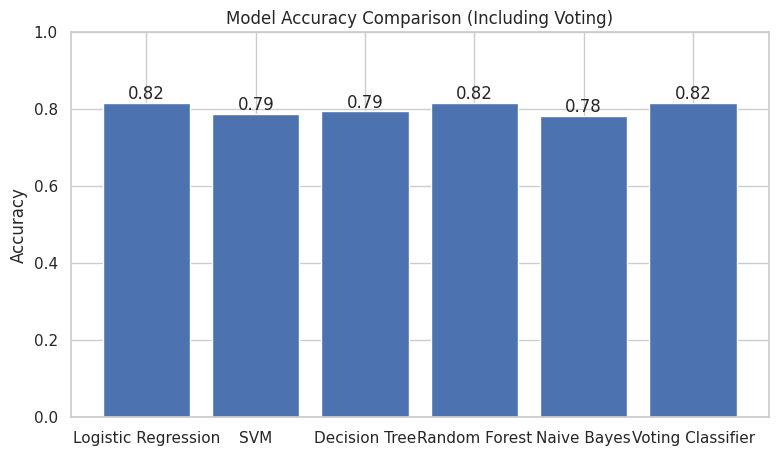

In [38]:
model_names = [
    'Logistic Regression',
    'SVM',
    'Decision Tree',
    'Random Forest',
    'Naive Bayes',
    'Voting Classifier'
]

model_accuracies = accuracies + [accuracy_score(y_test, y_pred_voting)]

plt.figure(figsize=(9,5))
plt.bar(model_names, model_accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Including Voting)")
plt.ylim(0,1)

for i, v in enumerate(model_accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()


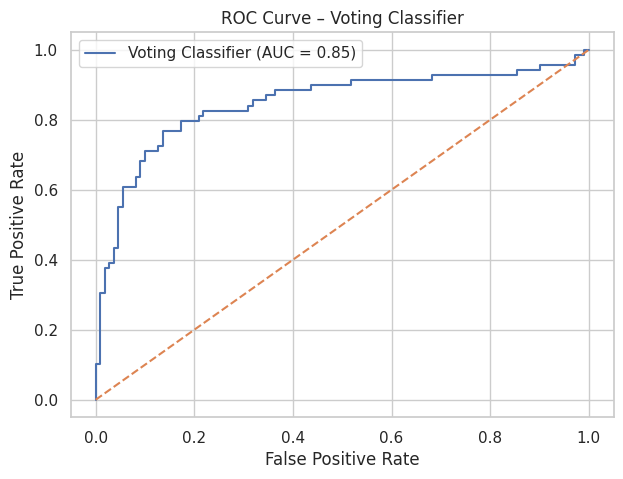

In [39]:
from sklearn.metrics import roc_curve, auc

y_proba_voting = voting_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba_voting)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Voting Classifier (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Voting Classifier')
plt.legend()
plt.show()


**From the accuracy comparison chart, we observe that:

- Logistic Regression and Random Forest achieved the highest standalone performance.
- Linear models performed competitively, indicating strong linear relationships in the data.
- The Voting Classifier combined the strengths of multiple models and achieved stable performance close to the top individual models.

This comparison highlights the importance of evaluating multiple approaches rather than relying on a single algorithm.**

# final Conclusion

**This project demonstrates a complete end-to-end Data Science workflow applied to the Titanic survival prediction problem.  
Starting from raw data exploration and visualization, the project progressed through data cleaning, feature engineering, model training, and performance evaluation.

Key takeaways from this project include:
- Passenger gender and ticket class are the most influential factors affecting survival.
- Feature engineering, such as family-related attributes, improves model stability.
- Simple models like Logistic Regression can perform competitively when supported by proper preprocessing.
- Ensemble techniques, such as the Voting Classifier, help achieve balanced and reliable performance.

Overall, this notebook reflects a real-world, production-style approach to machine learning, emphasizing clarity, interpretability, and systematic experimentation rather than relying solely on complex models.**